In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data collection

In [2]:
matches = pd.read_csv('ipl_2008_2023.csv')
matches.head()

,id,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
0,0,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.0,6.29,1
1,1,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.0,6.34,1
2,2,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.0,6.35,1
3,3,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.0,6.20,1
4,4,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.0,6.26,1


In [3]:
matches.shape

(106604, 11)

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106604 entries, 0 to 106603
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 106604 non-null  int64  
 1   batting_team       106604 non-null  object 
 2   bowling_team       106604 non-null  object 
 3   city               106604 non-null  object 
 4   runs_left          106604 non-null  int64  
 5   balls_left         106604 non-null  int64  
 6   wickets_remaining  106604 non-null  int64  
 7   total_run_x        106604 non-null  int64  
 8   crr                106604 non-null  float64
 9   rrr                106604 non-null  float64
 10  results            106604 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 8.9+ MB


Data Preprocessing

In [5]:
matches.isnull().sum()

id                   0
batting_team         0
bowling_team         0
city                 0
runs_left            0
balls_left           0
wickets_remaining    0
total_run_x          0
crr                  0
rrr                  0
results              0
dtype: int64

In [6]:
matches.describe()

,id,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
count,106604.000000,106604.000000,106604.000000,106604.000000,106604.000000,106604.000000,106604.000000,106604.000000
mean,53301.500000,90.539032,66.654497,7.428511,166.862397,9.654382,8.572438,0.433042
std,30774.068386,48.536013,32.164333,2.139389,29.410008,5.944946,4.426402,0.495499
min,0.000000,0.000000,4.000000,0.000000,63.000000,-0.000000,0.000000,0.000000
25%,26650.750000,52.000000,40.000000,6.000000,148.000000,7.380000,6.480000,0.000000
50%,53301.500000,89.000000,67.000000,8.000000,166.000000,8.680000,8.140000,0.000000
75%,79952.250000,126.000000,94.000000,9.000000,186.000000,10.310000,9.860000,1.000000
max,106603.000000,264.000000,125.000000,10.000000,264.000000,162.000000,131.000000,1.000000


In [7]:
matches.batting_team.value_counts()

batting_team
Delhi Capitals                 13721
Kolkata Knight Riders          13417
Mumbai Indians                 12574
Royal Challengers Bangalore    12126
Sunrisers Hyderabad            11825
Punjab Kings                   11033
Rajasthan Royals               10943
Chennai Super Kings            10301
Pune Warriors                   2883
Gujarat Titans                  2058
Gujarat Lions                   1754
Lucknow Super Giants            1735
Rising Pune Supergiant           861
Rising Pune Supergiants          699
Kochi Tuskers Kerala             674
Name: count, dtype: int64

In [8]:
matches.bowling_team.value_counts()

bowling_team
Punjab Kings                   15676
Sunrisers Hyderabad            13620
Delhi Capitals                 13438
Mumbai Indians                 12429
Chennai Super Kings            12337
Royal Challengers Bangalore    11544
Kolkata Knight Riders           9697
Rajasthan Royals                9259
Pune Warriors                   1879
Lucknow Super Giants            1658
Gujarat Titans                  1656
Gujarat Lions                   1274
Rising Pune Supergiant           807
Kochi Tuskers Kerala             733
Rising Pune Supergiants          597
Name: count, dtype: int64

In [9]:
# replace duplicates of team names
matches.batting_team = matches.batting_team.str.replace('Gujarat Lions','Gujarat Titans')
matches.bowling_team = matches.bowling_team.str.replace('Gujarat Lions','Gujarat Titans')

matches.batting_team = matches.batting_team.str.replace('Rising Pune Supergiant','Pune Warriors')
matches.bowling_team = matches.bowling_team.str.replace('Rising Pune Supergiant','Pune Warriors')

matches.batting_team = matches.batting_team.str.replace('Rising Pune Supergiants','Pune Warriors')
matches.bowling_team = matches.bowling_team.str.replace('Rising Pune Supergiants','Pune Warriors')

matches.batting_team = matches.batting_team.str.replace('Pune Warriorss','Pune Warriors')
matches.bowling_team = matches.bowling_team.str.replace('Pune Warriorss','Pune Warriors')



In [10]:
matches.batting_team.value_counts()

batting_team
Delhi Capitals                 13721
Kolkata Knight Riders          13417
Mumbai Indians                 12574
Royal Challengers Bangalore    12126
Sunrisers Hyderabad            11825
Punjab Kings                   11033
Rajasthan Royals               10943
Chennai Super Kings            10301
Pune Warriors                   4443
Gujarat Titans                  3812
Lucknow Super Giants            1735
Kochi Tuskers Kerala             674
Name: count, dtype: int64

In [11]:
matches.bowling_team.value_counts()

bowling_team
Punjab Kings                   15676
Sunrisers Hyderabad            13620
Delhi Capitals                 13438
Mumbai Indians                 12429
Chennai Super Kings            12337
Royal Challengers Bangalore    11544
Kolkata Knight Riders           9697
Rajasthan Royals                9259
Pune Warriors                   3283
Gujarat Titans                  2930
Lucknow Super Giants            1658
Kochi Tuskers Kerala             733
Name: count, dtype: int64

In [12]:
matches.batting_team.unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [13]:
teams = ['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Pune Warriors', 'Kochi Tuskers Kerala']

In [14]:
matches.head()

,id,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,total_run_x,crr,rrr,results
0,0,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,125,10,131,-0.0,6.29,1
1,1,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,124,10,131,-0.0,6.34,1
2,2,Gujarat Titans,Rajasthan Royals,Ahmedabad,126,119,10,131,30.0,6.35,1
3,3,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,118,10,131,27.0,6.20,1
4,4,Gujarat Titans,Rajasthan Royals,Ahmedabad,122,117,10,131,18.0,6.26,1


In [15]:
#remove unwanted coloumns
unwanted = ['city', 'crr', 'rrr','id']
matches.drop(unwanted, axis=1, inplace=True)
matches.head()

,batting_team,bowling_team,runs_left,balls_left,wickets_remaining,total_run_x,results
0,Gujarat Titans,Rajasthan Royals,131,125,10,131,1
1,Gujarat Titans,Rajasthan Royals,131,124,10,131,1
2,Gujarat Titans,Rajasthan Royals,126,119,10,131,1
3,Gujarat Titans,Rajasthan Royals,122,118,10,131,1
4,Gujarat Titans,Rajasthan Royals,122,117,10,131,1


In [16]:
matches.batting_team.unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

Data Visuaization

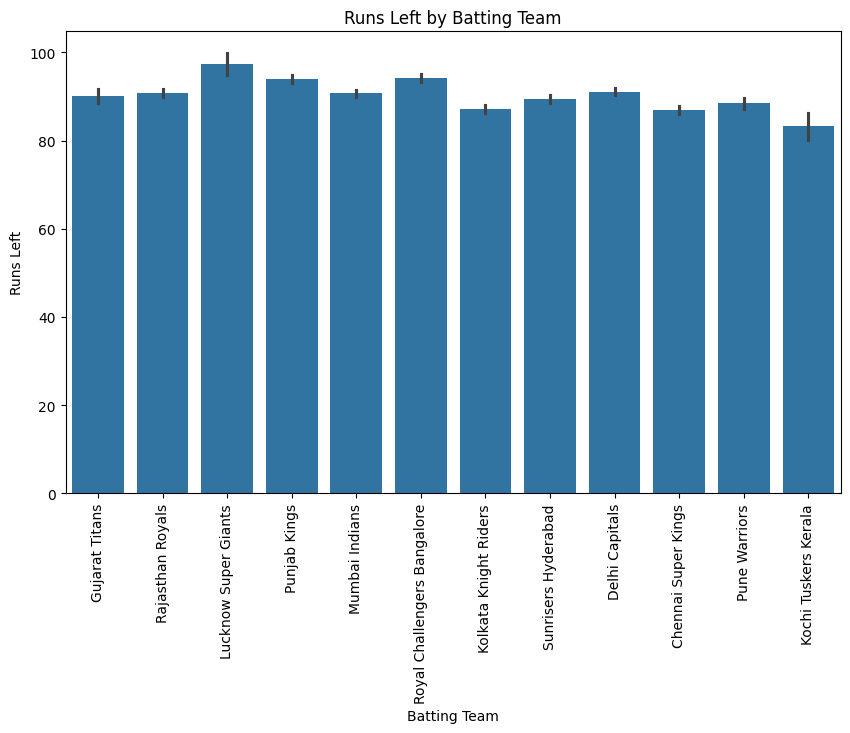

In [17]:
# Bar chart for comparing runs scored by different teams
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='runs_left', data=matches)
plt.title('Runs Left by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Runs Left')
plt.xticks(rotation=90)
plt.show()

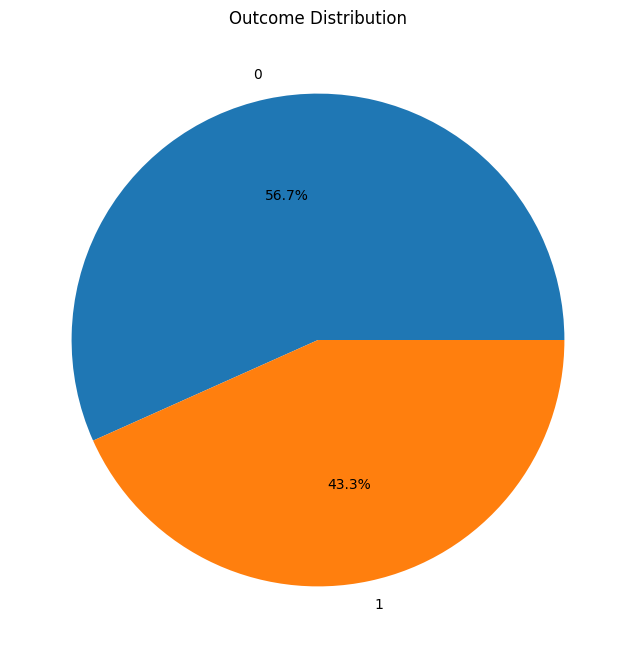

In [18]:
# Pie chart for showing the distribution of outcomes
plt.figure(figsize=(8, 8))
matches['results'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.ylabel('')
plt.show()

In [19]:
#encode the chategorical data

#encoding the batting team column
matches.replace({'batting_team':{'Gujarat Titans': 12, 'Rajasthan Royals':1, 'Lucknow Super Giants':2,'Punjab Kings': 3, 'Mumbai Indians':4, 'Royal Challengers Bangalore':5,'Kolkata Knight Riders': 6, 'Sunrisers Hyderabad':7, 'Delhi Capitals':8,'Chennai Super Kings':9, 'Pune Warriors':10, 'Kochi Tuskers Kerala':11}},inplace=True)
#encoding the bowling team column
matches.replace({'bowling_team':{'Gujarat Titans': 12, 'Rajasthan Royals':1, 'Lucknow Super Giants':2,'Punjab Kings': 3, 'Mumbai Indians':4, 'Royal Challengers Bangalore':5,'Kolkata Knight Riders': 6, 'Sunrisers Hyderabad':7, 'Delhi Capitals':8,'Chennai Super Kings':9, 'Pune Warriors':10, 'Kochi Tuskers Kerala':11}},inplace=True)

C:\Users\MUHAMMED HASHIM\AppData\Local\Temp\ipykernel_21460\3009345279.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matches.replace({'batting_team':{'Gujarat Titans': 12, 'Rajasthan Royals':1, 'Lucknow Super Giants':2,'Punjab Kings': 3, 'Mumbai Indians':4, 'Royal Challengers Bangalore':5,'Kolkata Knight Riders': 6, 'Sunrisers Hyderabad':7, 'Delhi Capitals':8,'Chennai Super Kings':9, 'Pune Warriors':10, 'Kochi Tuskers Kerala':11}},inplace=True)
C:\Users\MUHAMMED HASHIM\AppData\Local\Temp\ipykernel_21460\3009345279.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option

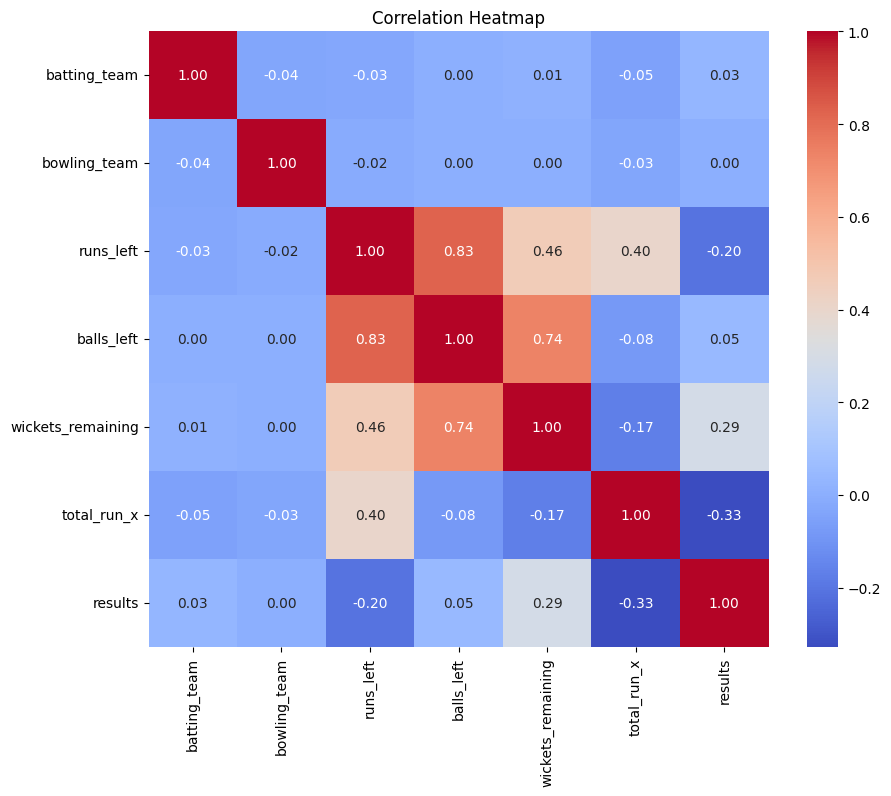

In [20]:
# Compute the correlation matrix
correlation_matrix = matches.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [21]:
#splitting data and target
X = matches.drop(columns=['results'])
Y = matches.results


In [22]:
X.head()

,batting_team,bowling_team,runs_left,balls_left,wickets_remaining,total_run_x
0,12,1,131,125,10,131
1,12,1,131,124,10,131
2,12,1,126,119,10,131
3,12,1,122,118,10,131
4,12,1,122,117,10,131


In [23]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: results, dtype: int64

In [24]:
#splitting X,Y into training and testing.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Model Building and Evaluation

In [25]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))






Accuracy: 0.7169926363679002

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     12237
           1       0.67      0.65      0.66      9084

    accuracy                           0.72     21321
   macro avg       0.71      0.71      0.71     21321
weighted avg       0.72      0.72      0.72     21321




Confusion Matrix:


<Axes: >

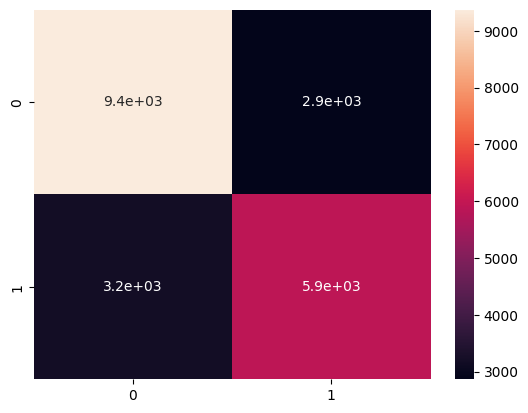

In [27]:
# Confusion Matrix
print("\nConfusion Matrix:")
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, Y_train)

# Predict on the test set
Y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))



Accuracy: 0.9866797992589466

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12237
           1       0.98      0.98      0.98      9084

    accuracy                           0.99     21321
   macro avg       0.99      0.99      0.99     21321
weighted avg       0.99      0.99      0.99     21321




Confusion Matrix:


<Axes: >

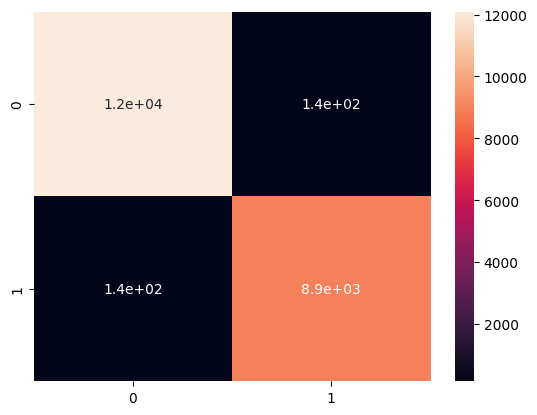

In [29]:
# Confusion Matrix
print("\nConfusion Matrix:")
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, Y_train)

# Predict on the test set
Y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))



Accuracy: 0.9955442990478871

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12237
           1       0.99      0.99      0.99      9084

    accuracy                           1.00     21321
   macro avg       1.00      1.00      1.00     21321
weighted avg       1.00      1.00      1.00     21321




Confusion Matrix:


<Axes: >

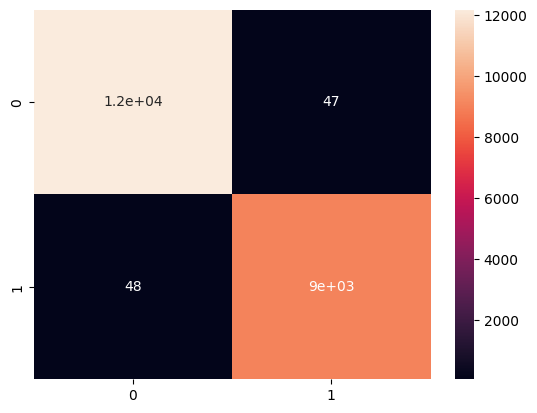

In [31]:
# Confusion Matrix
print("\nConfusion Matrix:")
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True)

Model Deployment

In [32]:
print(cf_matrix)

[[12190    47]
 [   48  9036]]


In [33]:
import pickle
pickle.dump(random_forest,open('./random_forest_model.sav', 'wb'))

In [34]:
X_test

,batting_team,bowling_team,runs_left,balls_left,wickets_remaining,total_run_x
102857,8,7,119,84,9,198
25149,7,5,159,84,9,219
48654,7,5,85,80,10,167
85032,6,9,124,91,7,165
4883,2,5,34,17,4,182
...,...,...,...,...,...,...
35396,3,8,91,38,4,189
78968,5,11,41,32,7,162
14571,1,3,47,26,5,222
25725,5,8,153,104,8,182
